In [ ]:
# 22/01/06
# by 건우
# CT 이미지에서 폐영역 추출 preprocessing
# 이미지를 학습에 편하도록 정제

In [1]:
!cd /content/drive/MyDrive/lung

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from skimage.io import imread          # python 이미지 처리 라이브러리
from skimage.transform import pyramid_reduce, resize

import os, glob

In [7]:
img_list = sorted(glob.glob('/content/drive/MyDrive/lung/2d_images/*.tif'))        # img를 리스트에 담는다.
mask_list = sorted(glob.glob('/content/drive/MyDrive/lung/2d_masks/*.tif'))        # mask를 리스트에 담는다.

print(len(img_list), len(mask_list))

267 267


In [9]:
IMG_SIZE = 256

x_data, y_data = np.empty((2, len(img_list), IMG_SIZE, IMG_SIZE, 1), dtype=np.float32)    # 0으로 채워진 numpy 데이터 생성
# print(x_data)

In [ ]:
# scikit-image의 io모듈에 있는 imread() 함수를 사용해 이미지 읽기 가능.
# ndarray타입의 데이터로 읽어옴

for i, img_path in enumerate(img_list):
    img = imread(img_path)
    img = resize(img, output_shape=(IMG_SIZE, IMG_SIZE, 1), preserve_range=True)
    # 원래 값 범위를 유지할지 여부 / False 입력 이미지가 img_as_float 의 규칙에 따라 변환됩니다 .
    x_data[i] = img

# print(x_data)

In [11]:
for i, img_path in enumerate(mask_list):
    img = imread(img_path)
    img = resize(img, output_shape=(IMG_SIZE, IMG_SIZE, 1), preserve_range=True)
    y_data[i] = img
    
y_data /= 255.

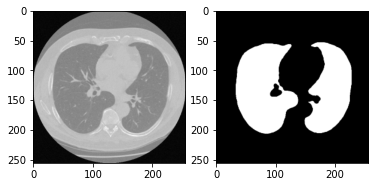

In [13]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(x_data[10].squeeze(), cmap='gray')
ax[1].imshow(y_data[10].squeeze(), cmap='gray')

In [14]:
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1)

np.save('/content/drive/MyDrive/lung/dataset/x_train.npy', x_train)
np.save('/content/drive/MyDrive/lung/dataset/y_train.npy', y_train)
np.save('/content/drive/MyDrive/lung/dataset/x_val.npy', x_val)
np.save('/content/drive/MyDrive/lung/dataset/y_val.npy', y_val)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(240, 256, 256, 1) (240, 256, 256, 1)
(27, 256, 256, 1) (27, 256, 256, 1)
